### UCI -- Breast Cancer Detection Dataset Project

[Breast Cancer Wisconsin Disgnostic Data Set](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)



In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv("breast-cancer-wisconsin.data.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [90]:
df.columns = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']


In [91]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [92]:
df.shape

(699, 11)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Data Pre-processing

In [94]:
df['Bare Nuclei'].describe()

count     699
unique     11
top         1
freq      402
Name: Bare Nuclei, dtype: object

In [95]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [96]:
df[df['Bare Nuclei'] == "?"]

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [97]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [98]:
df['Bare Nuclei'].replace("?", np.NAN, inplace=True)
df = df.dropna()

In [99]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [100]:
df['Class'] = df['Class'] / 2 - 1

In [101]:
df['Class'].value_counts()

0.0    444
1.0    239
Name: Class, dtype: int64

In [102]:
df.columns

Index(['id', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null float64
dtypes: float64(1), int64(9), object(1)
memory usage: 64.0+ KB


In [104]:
X = df.drop(['id', 'Class'], axis=1)
X_col = X.columns

In [105]:
y = df['Class']

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
X = StandardScaler().fit_transform(X.values)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
df1 = pd.DataFrame(X, columns=X_col)

In [110]:
df1.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [111]:
X_train, X_test, y_train, y_test = train_test_split(df1, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [112]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['id', 'Class'], axis=1).values), columns=X_col).head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0


In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')

In [115]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [116]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [117]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))        

In [118]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9725

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       365
        1.0       0.96      0.96      0.96       181

avg / total       0.97      0.97      0.97       546


Confusion Matrix: 
 [[358   7]
 [  8 173]]

Average Accuracy: 	 0.9635
Accuracy SD: 		 0.0162


In [119]:
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9562

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.94      0.99      0.96        79
        1.0       0.98      0.91      0.95        58

avg / total       0.96      0.96      0.96       137


Confusion Matrix: 
 [[78  1]
 [ 5 53]]



# Grid Search

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [122]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [123]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),
                              params, 
                              n_jobs=-1,
                              verbose=1)

In [124]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [125]:
grid_search_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [126]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9725

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       365
        1.0       0.96      0.96      0.96       181

avg / total       0.97      0.97      0.97       546


Confusion Matrix: 
 [[358   7]
 [  8 173]]

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


Average Accuracy: 	 0.9635
Accuracy SD: 		 0.0181


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [127]:
print_score(grid_search_cv, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9562

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.94      0.99      0.96        79
        1.0       0.98      0.91      0.95        58

avg / total       0.96      0.96      0.96       137


Confusion Matrix: 
 [[78  1]
 [ 5 53]]



In [128]:
grid_search_cv.best_params_

{'n_neighbors': 7}

In [129]:
grid_search_cv.cv_results_['mean_train_score']

array([1.        , 0.96703277, 0.97528466, 0.97161912, 0.9725374 ,
       0.97070337, 0.97161158, 0.96977754, 0.96978258, 0.97070085])

In [130]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.0058372 , 0.00377719, 0.00346025, 0.00180165, 0.00176724,
        0.00179466, 0.00205978, 0.00180054, 0.00178274, 0.00175095]),
 'mean_score_time': array([0.01131495, 0.00433238, 0.00382249, 0.00231584, 0.00241645,
        0.00245531, 0.0027558 , 0.00253828, 0.00260989, 0.00258724]),
 'mean_test_score': array([0.94871795, 0.94505495, 0.96520147, 0.96520147, 0.96703297,
        0.96336996, 0.96886447, 0.96703297, 0.96886447, 0.96703297]),
 'mean_train_score': array([1.        , 0.96703277, 0.97528466, 0.97161912, 0.9725374 ,
        0.97070337, 0.97161158, 0.96977754, 0.96978258, 0.97070085]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors':

### SVM, Random Forest, XGBoost

In [134]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9799

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.99      0.98      0.98       365
        1.0       0.96      0.98      0.97       181

avg / total       0.98      0.98      0.98       546


Confusion Matrix: 
 [[358   7]
 [  4 177]]

Average Accuracy: 	 0.9635
Accuracy SD: 		 0.0199
Test Result:

accuracy score: 0.9635

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.96      0.97      0.97        79
        1.0       0.96      0.95      0.96        58

avg / total       0.96      0.96      0.96       137


Confusion Matrix: 
 [[77  2]
 [ 3 55]]



In [136]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9982

Classification Report: 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       365
        1.0       1.00      0.99      1.00       181

avg / total       1.00      1.00      1.00       546


Confusion Matrix: 
 [[365   0]
 [  1 180]]

Average Accuracy: 	 0.9579
Accuracy SD: 		 0.0164
Test Result:

accuracy score: 0.9416

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.92      0.99      0.95        79
        1.0       0.98      0.88      0.93        58

avg / total       0.94      0.94      0.94       137


Confusion Matrix: 
 [[78  1]
 [ 7 51]]



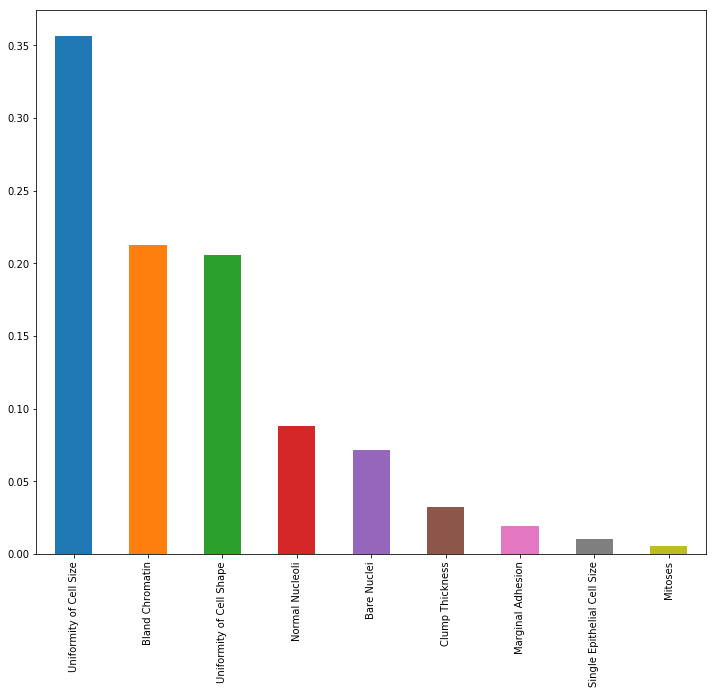

In [137]:
pd.Series(clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,10));

In [138]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9927

Classification Report: 
              precision    recall  f1-score   support

        0.0       1.00      0.99      0.99       365
        1.0       0.98      0.99      0.99       181

avg / total       0.99      0.99      0.99       546


Confusion Matrix: 
 [[362   3]
 [  1 180]]

Average Accuracy: 	 0.9616
Accuracy SD: 		 0.0190
Test Result:

accuracy score: 0.9489

Classification Report: 
              precision    recall  f1-score   support

        0.0       0.93      0.99      0.96        79
        1.0       0.98      0.90      0.94        58

avg / total       0.95      0.95      0.95       137


Confusion Matrix: 
 [[78  1]
 [ 6 52]]



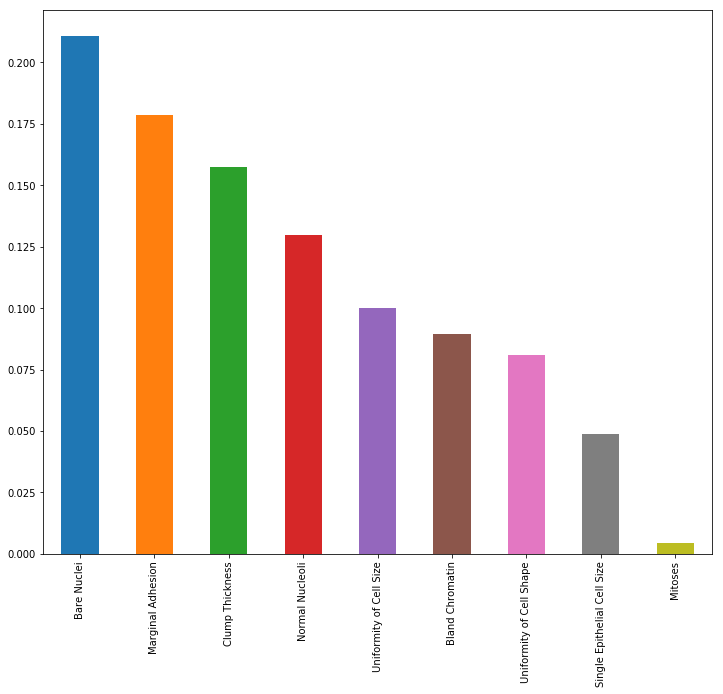

In [139]:
pd.Series(clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,10));